# Simple CNN for MNIST 

Using the MNIST dataset (70 000 pictures of hand-written digits) we will train a simple CNN, which is able to predict a digit given a picture of a hand-written digit.

Adapted from: https://github.com/kenophobio/keras-example-notebook

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


Network parameters:

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = 3 #(3, 3)

Prepare data into training and test set.

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


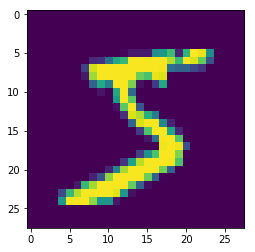

In [11]:
plt.imshow(X_train[0])

In [15]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols,1)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


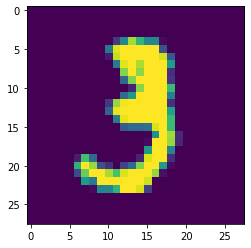

In [35]:
plt.imshow(X_train[10][:,:,:]);

Build the CNN. 

In [13]:
kernel_size

3

In [18]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size,
                        padding='same',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Show a summary of the model parameters. 

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 26, 26)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 32, 24, 24)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

And now train the model and evaluate on the test set. 

In [37]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Epoch 1/12
469/469 [==============================] - 39s 82ms/step - loss: 2.3025 - accuracy: 0.1171 - val_loss: 2.3023 - val_accuracy: 0.3295
Epoch 2/12
469/469 [==============================] - 40s 86ms/step - loss: 2.3023 - accuracy: 0.1963 - val_loss: 2.3022 - val_accuracy: 0.2410
Epoch 3/12
469/469 [==============================] - 35s 75ms/step - loss: 2.3022 - accuracy: 0.2015 - val_loss: 2.3021 - val_accuracy: 0.1732
Epoch 4/12
469/469 [==============================] - 37s 79ms/step - loss: 2.3022 - accuracy: 0.1845 - val_loss: 2.3021 - val_accuracy: 0.1329
Epoch 5/12
469/469 [==============================] - 45s 96ms/step - loss: 2.3022 - accuracy: 0.1708 - val_loss: 2.3021 - val_accuracy: 0.1192
Epoch 6/12
469/469 [==============================] - 45s 96ms/step - loss: 2.3021 - accuracy: 0.1593 - val_loss: 2.3021 - val_accuracy: 0.1145
Epoch 7/12
469/469 [==============================] - 47s 101ms/step - loss: 2.3021 - accuracy: 0.1494 - val_loss: 2.3020 - val_accuracy

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0309755772928
Test accuracy: 0.9897


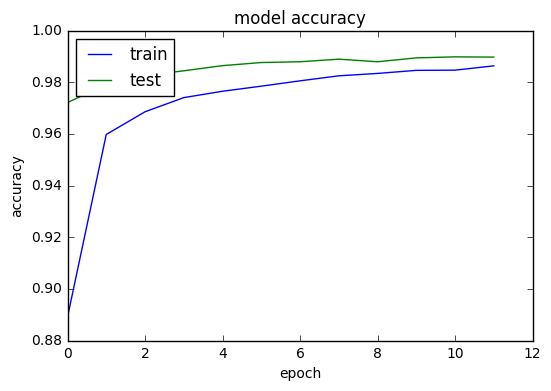

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
#https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras        

In [ ]:
#display_activation(activations, 8, 8, 1)